In [33]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()

f.load("human10.fasta",enter)
for i in enter:
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName() 
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
for i in result:
   print(i.toString())

MASCASIDIEDATQHLR
DILK
LDRPAGGPSAESPRPSSAYNGDLNGLLVPDPLCSGDSTSANK
TGLR
TMPPINLQEK
QVICLSGDDSSTCIGILAK
EVEIVASSDSSISSK
AR
GSNK
VK
IQPVAK
YDWEQK
YYYGNLIAVSNSFLAYAIR
AANNGSAMVR
VISVSTSER
TLLK
GFTGSVADLAFAHLNSPQLACLDEAGNLFVWR
LALVNGK
IQEEILVHIR
QPEGTPLNHFR
R
IIWCPFIPEESEDCCEESSPTVALLHEDR
AEVWDLDMLR
SSHSTWPVDVSQIK
QGFIVVK
GHSTCLSEGALSPDGTVLATASHDGYVK
FWQIYIEGQDEPR
CLHEWKPHDGRPLSCLLFCDNHK
K
QDPDVPFWR
FLITGADQNR
ELK
MWCTVSWTCLQTIR
FSPDIFSSVSVPPSLK
VCLDLSAEYLILSDVQR
K
VLYVMELLQNQEEGHACFSSISEFLLTHPVLSFGIQVVSR
CR
LR
HTEVLPAEEENDSLGADGTHGAGAMESAAGVLIK
LFCVHTK
ALQDVQIR
FQPQLNPDVVAPLPTHTAHEDFTFGESRPELGSEGLGSAAHGSQPDLR
R
IVELPAPADFLSLSSETKPK
LMTPDAFMTPSASLQQITASPSSSSSGSSSSSSSSSSSLTAVSAMSSTSAVDPSLTRPPEELTLSPK
LQLDGSLTMSSSGSLQASPR
GLLPGLLPAPADK
LTPK
GPGQVPTATSALSLELQEVEPLGLPQASPSR
TR
SPDVISSASTALSQDIPEIASEALSR
GFGSSAPEGLEPDSMASAASALHLLSPRPRPGPELGPQLGLDGGPGDGDR
HNTPSLLEAALTQEASTPDSQVWPTAPDITR
ETCSTLAESPR
NGLQEK
HK
SLAFHRPPYHLLQQR
DSQDASAEQSDHDDEVASLASASGGFGTK
VPAPR
LPAK
DWK
TK
GSPR
TSPK
LK
R
K
SK
K
DDG

In [34]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()
f.load("human10.fasta",enter)
for i in enter :
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName()
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
peptides = [AASequence.fromString(i.toString()) for i in result]

for peptide in peptides:
    tsg = TheoreticalSpectrumGenerator()
    theo_spectrum = MSSpectrum()
    spec1 = MSSpectrum()

    p = Param()
    p.setValue("add_b_ions", "true")
    p.setValue("add_y_ions", "true")
    p.setValue("add_losses", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 1) 
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
        print(ion.decode(), "is generated at m/z", peak.getMZ())


Spectrum 1 of MASCASIDIEDATQHLR has 108 peaks.
y1-C1H2N1O1+ is generated at m/z 131.10531384957102
y1-C1H2N2+ is generated at m/z 133.097154849571
b3-H2O1+ is generated at m/z 141.065854721971
y1-H3N1+ is generated at m/z 158.092403817671
y1+ is generated at m/z 175.118952913371
b2+ is generated at m/z 203.08487564337105
b4-H2O1+ is generated at m/z 244.07503961147097
y2-C1H2N1O1+ is generated at m/z 244.18937820047103
y2-C1H2N2+ is generated at m/z 246.18121920047102
y2-H3N1+ is generated at m/z 271.17646816857103
y2+ is generated at m/z 288.203017264271
b3+ is generated at m/z 290.11690480287103
b5-H2O1+ is generated at m/z 315.11215377097096
y3-C1H2N1O1+ is generated at m/z 381.24829042377104
y3-C1H2N2+ is generated at m/z 383.240131423771
b4+ is generated at m/z 393.126089692371
b6-H2O1+ is generated at m/z 402.14418293047095
y3-H3N1+ is generated at m/z 408.23538039187105
y3+ is generated at m/z 425.261929487571
b5+ is generated at m/z 464.163203851871
y4-C1H2N1O1+ is generated at

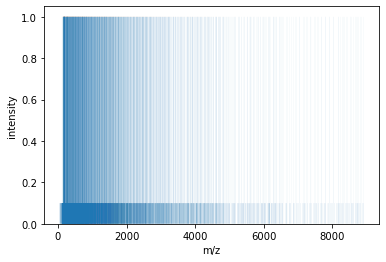

In [35]:
import numpy as np
from matplotlib import pyplot as plt
for r in result:
    peptide = AASequence.fromString(r.toString())
    tsg.getSpectrum(spec1,r,1,1)
plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False) 
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.show()

In [36]:
from pyopenms import *
exp = MSExperiment()
MzMLFile().load("Fusion_180220_40.mzML", exp)
spectra = exp.getSpectra()
observed_spectrum = spectra[0]

In [37]:
tsg = TheoreticalSpectrumGenerator()
theo_spectrum = MSSpectrum()
p = tsg.getParameters()
p.setValue("add_y_ions", "true")
p.setValue("add_b_ions", "true")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(theo_spectrum, peptide, 1, 1)

40.018175498671
6934.325783934568


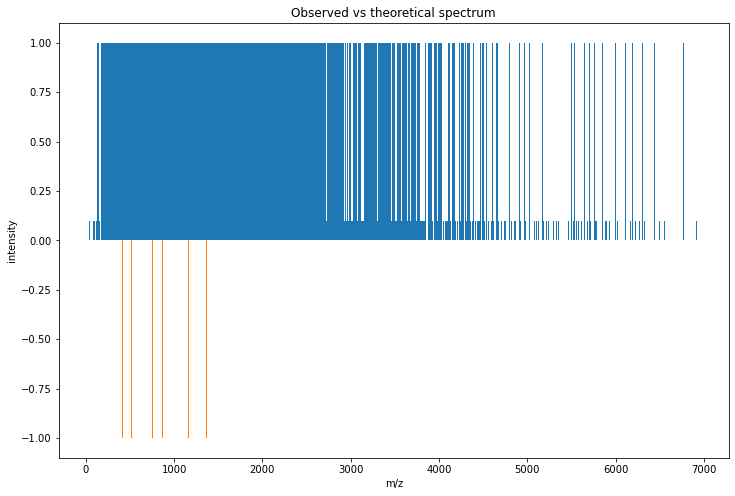

In [38]:
import numpy as np
from matplotlib import pyplot as plt
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] 
    theo_int = [element * -1 for element in theo_int] 
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = observed_spectrum.get_peaks()
print(min(obs_mz)) 
print(max(obs_mz)) 


theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= min(obs_mz) and mz <= max(obs_mz):
        theo_mz.append(mz)
        theo_int.append(intensity)

title = 'Observed vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

In [39]:
alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)

In [40]:
print("Number of matched peaks: " + str(len(alignment)))
print("ion\ttheo. m/z\tobserved m/z")

for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
      + str(theo_spectrum[theo_idx].getMZ())
      + "\t" + str(observed_spectrum[obs_idx].getMZ()))

Number of matched peaks: 24
ion	theo. m/z	observed m/z
b2+	1	201.123369977171	201.123369977171
y2+	1	229.15467010477101	229.15467010477104
b3+	1	314.207434328071	314.20743432807103
y3+	1	316.186699264271	316.18669926427106
y4+	1	413.239463487571	413.239463487571
b4+	1	445.247919345171	445.247919345171
y5+	1	514.287142710871	514.287142710871
b5+	1	558.331983696071	558.3319836960709
y6+	1	613.355556997971	613.355556997971
b6+	1	695.390895919371	695.4073121255709
y7+	1	726.439621348871	726.414469221271
b7+	1	752.412360015071	752.4123600150709
y8+	1	783.461085444571	783.461085444571
b8+	1	865.496424365971	865.4818205083711
y9+	1	920.519997667871	920.519997667871
b9+	1	964.5648386530711	964.5502347954708
y10+	1	1033.6040620187712	1033.6166380825712
b10+	1	1065.6125178763712	1065.607803954971
b11+	1	1162.6652820996712	1162.634080178271
y11+	1	1164.644547035871	1164.648387178271
b12+	1	1249.6973112591713	1249.7013332591712
y12+	1	1277.728611386771	1277.7324515291712
b13+	1	1362.7813756100713	

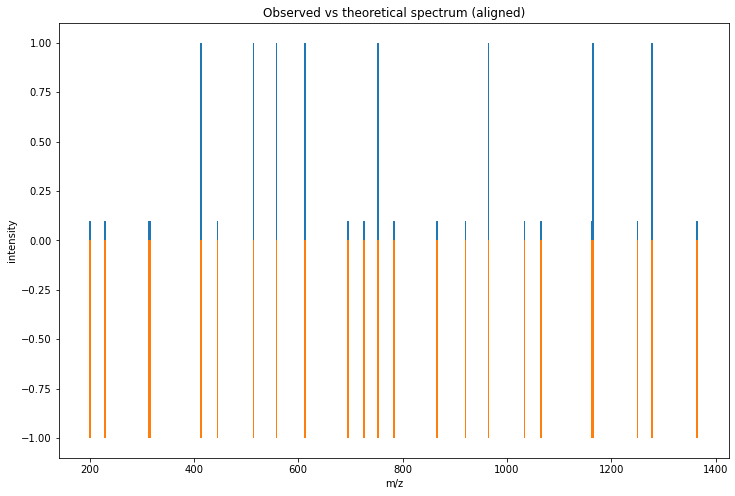

In [41]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(observed_spectrum[obs_idx].getMZ())
    obs_int.append(observed_spectrum[obs_idx].getIntensity())

title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

In [11]:
from pyopenms import *
import matplotlib.pyplot as plt

In [12]:
exp = MSExperiment()
MzMLFile().load("D:\\fourth year projects\\Fusion_180220_40.mzML", exp)

In [13]:
def plotSpectrun(index):
    fig = plt.subplots(figsize =(10, 7))
    spec=exp[index]
    mz, intensity = spec.get_peaks()
    
    p1 = plt.bar(mz, intensity)
    plt.ylim([0, max(intensity)])
    plt.xlim([100, 800])
    
    plt.title("MS Level: " + str(spec.getMSLevel()))
    plt.ylabel('Intensity')
    plt.xlabel('m/z')
    plt.show()

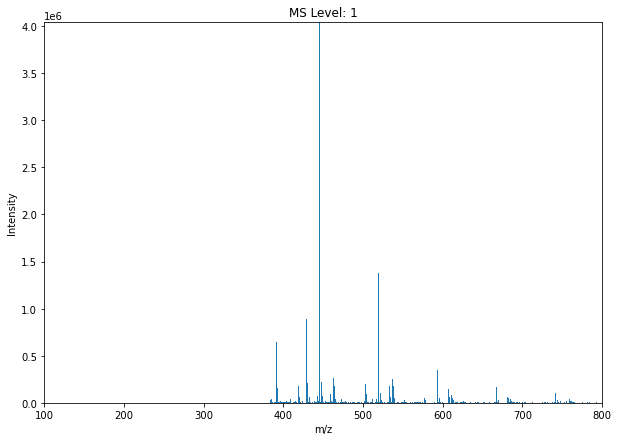

In [14]:
plotSpectrun(1000)

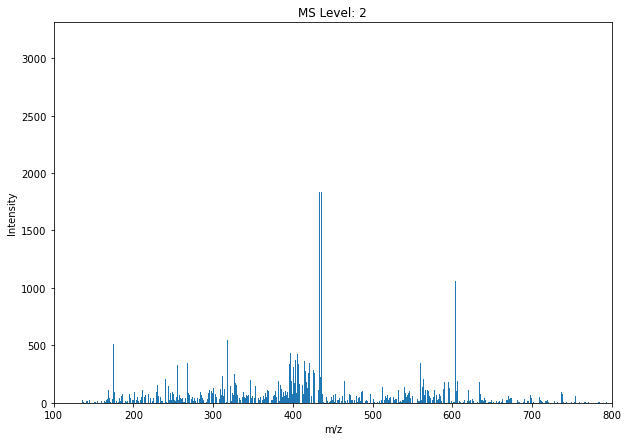

In [15]:
plotSpectrun(10010)